In [1]:
import pandas as pd
import numpy as np

In [2]:
#한글파일 읽어오면 utf-8 관련 에러발생
#encoding= 'ISO-8859-1' 추가하면 에러는 피할 수 있지만 한글은 여전히 깨짐
#engine = 'python' 추가하면 에러도 피하고 한글도 안 깨짐

spring = pd.read_csv('data/all season.csv', engine = 'python')

In [3]:
spring.head()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
0,언어의 온도(3주년 150만부 기념 에디션),말과 글에는 나름의 따뜻함과 차가움이 있다,20160819.0,시/에세이,13800.0,8.8,308,1,6,1,1
1,잠. 1(양장본 HardCover),베르나르 베르베르 장편소설,20170608.0,소설,13800.0,9.3,336,1,4,2,1
2,82년생 김지영(오늘의 젊은 작가 13)(양장본 HardCover),조남주 장편소설,20161014.0,소설,13000.0,8.9,192,1,8,3,1
3,말의 품격,말과 사람과 품격에 대한 생각들,20190318.0,인문,14500.0,8.7,232,1,5,4,1
4,오직 두 사람,김영하 소설,20170525.0,소설,13000.0,9.2,272,1,7,5,1


In [4]:
spring.loc[spring['분야'] == '소설', '분야'] = 1
spring.loc[spring['분야'] == '시/에세이', '분야'] = 2
spring.loc[spring['분야'] == '인문', '분야'] = 3
spring.loc[spring['분야'] == '가정/육아', '분야'] = 4
spring.loc[spring['분야'] == '요리', '분야'] = 5
spring.loc[spring['분야'] == '건강', '분야'] = 6
spring.loc[spring['분야'] == '취미/실용/스포츠', '분야'] = 7
spring.loc[spring['분야'] == '경제/경영', '분야'] = 8
spring.loc[spring['분야'] == '자기계발', '분야'] = 9
spring.loc[spring['분야'] == '정치/사회', '분야'] = 10
spring.loc[spring['분야'] == '역사/문화', '분야'] = 11
spring.loc[spring['분야'] == '종교', '분야'] = 11
spring.loc[spring['분야'] == '예술/대중문화', '분야'] = 11
spring.loc[spring['분야'] == '한국소개도서', '분야'] = 11
spring.loc[spring['분야'] == '중/고등참고서', '분야'] = 12
spring.loc[spring['분야'] == '대학교재', '분야'] = 12
spring.loc[spring['분야'] == '기술/공학', '분야'] = 13
spring.loc[spring['분야'] == '컴퓨터/IT', '분야'] = 13
spring.loc[spring['분야'] == '외국어', '분야'] = 14
spring.loc[spring['분야'] == '여행', '분야'] = 14
spring.loc[spring['분야'] == '과학', '분야'] = 15
spring.loc[spring['분야'] == '취업/수험서', '분야'] = 16
spring.loc[spring['분야'] == '자격증/수험서작가', '분야'] = 16
spring.loc[spring['분야'] == '잡지', '분야'] = 17
spring.loc[spring['분야'] == '만화', '분야'] = 17
spring.loc[spring['분야'] == ':K컬렉션', '분야'] = 17
spring.loc[spring['분야'] == '청소년', '분야'] = 18
spring.loc[spring['분야'] == '초등참고서', '분야'] = 19
spring.loc[spring['분야'] == '어린이(초등)', '분야'] = 19
spring.loc[spring['분야'] == '어린이전집', '분야'] = 19
spring.loc[spring['분야'] == '어린이영어', '분야'] = 19
spring.loc[spring['분야'] == '유아(0~7세)', '분야'] = 20
spring.loc[spring['분야'].isnull(), '분야'] = 0

In [5]:
spring.loc[spring['쪽수'] == '준비중', '쪽수'] = 371
spring.loc[spring['쪽수'] == '210 * 270 mm  판형알림', '쪽수'] = 371
spring.loc[spring['쪽수'] == '178 * 238 * 18 mm /357g  판형알림', '쪽수'] = 371

In [6]:
spring.loc[spring['부제목'].notnull(), '부제목'] = 1
spring.loc[spring['부제목'].isnull(), '부제목'] = 0

In [7]:
spring.isnull().sum()

도서명          0
부제목          0
출간일         17
분야           0
정가          32
평점           2
쪽수           0
eBook 여부     0
제목 길이        0
순위           0
베스트셀러 여부     0
dtype: int64

In [8]:
spring['정가'] = spring['정가'].fillna(spring['정가'].mean())
spring.loc[spring['분야'].isnull(), '분야'] = 0

In [9]:
# spring['쪽수'] = int(spring['쪽수'])
spring['쪽수'] = spring['쪽수'].astype(int)
spring['분야'] = spring['분야'].astype(int)

In [10]:
print(spring['쪽수'].dtype)
print(spring['분야'].dtype)
print(spring['제목 길이'].dtype)
print(spring['정가'].dtype)

int32
int32
int64
float64


In [11]:
# 각 분야 별 합계 구하기
category = ['기타', '소설', '시/에세이', '인문', '가정/육아', '요리', '건강', '취미/실용/스포츠', '경제/경영', '자기계발', '정치/사회', '역사/문화, 종교, 예술/대중문화, 한국소개도서',
            '기술/공학, 컴퓨터/IT', '외국어, 여행', '과학', '취업/수험서',
        '잡지, 만화, :K컬렉션', '초등참고서, 어린이(초등), 어린이전집, 어린이영어', '유아(0~7세)']

In [12]:
catValue = spring['분야'].value_counts().sort_index()
catValue

0       38
1     2034
2     1709
3     1808
4      335
5      181
6      230
7      248
8     1532
9     1137
10     321
11     884
12       1
13     679
14     771
15     328
16     798
17     544
19     950
20     460
Name: 분야, dtype: int64

In [13]:
print(catValue)
print(category)

0       38
1     2034
2     1709
3     1808
4      335
5      181
6      230
7      248
8     1532
9     1137
10     321
11     884
12       1
13     679
14     771
15     328
16     798
17     544
19     950
20     460
Name: 분야, dtype: int64
['기타', '소설', '시/에세이', '인문', '가정/육아', '요리', '건강', '취미/실용/스포츠', '경제/경영', '자기계발', '정치/사회', '역사/문화, 종교, 예술/대중문화, 한국소개도서', '기술/공학, 컴퓨터/IT', '외국어, 여행', '과학', '취업/수험서', '잡지, 만화, :K컬렉션', '초등참고서, 어린이(초등), 어린이전집, 어린이영어', '유아(0~7세)']


In [14]:
data_l = []
for i in catValue:
    data_l.append(i)
    
print(len(data_l))
print(len(category))

20
19


In [15]:
spring.head()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
0,언어의 온도(3주년 150만부 기념 에디션),1,20160819.0,2,13800.0,8.8,308,1,6,1,1
1,잠. 1(양장본 HardCover),1,20170608.0,1,13800.0,9.3,336,1,4,2,1
2,82년생 김지영(오늘의 젊은 작가 13)(양장본 HardCover),1,20161014.0,1,13000.0,8.9,192,1,8,3,1
3,말의 품격,1,20190318.0,3,14500.0,8.7,232,1,5,4,1
4,오직 두 사람,1,20170525.0,1,13000.0,9.2,272,1,7,5,1


In [16]:
spring.tail()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
14983,다크 타워. 6: 수재나의 노래,0,20191226.0,1,18000.0,8.6,644,1,17,0,0
14984,논점민법강의: 가족법(6판),0,20200101.0,16,20000.0,9.3,263,0,11,0,0
14985,하이스쿨 D×D. 11(완결),0,20200101.0,17,5500.0,10.0,160,1,12,0,0
14986,"리키, 너도 구를 수 있어!(양장본 HardCover)",0,20191122.0,20,12000.0,0.0,36,0,15,0,0
14987,라임튜브와 함께하는 우리 아이 유튜브 스타 만들기,1,20200106.0,13,15000.0,10.0,224,1,27,0,0


In [17]:
spring = spring[['부제목', '분야', '정가', '쪽수', 'eBook 여부', '제목 길이', '베스트셀러 여부']]

In [18]:
spring.head()

,부제목,분야,정가,쪽수,eBook 여부,제목 길이,베스트셀러 여부
0,1,2,13800.0,308,1,6,1
1,1,1,13800.0,336,1,4,1
2,1,1,13000.0,192,1,8,1
3,1,3,14500.0,232,1,5,1
4,1,1,13000.0,272,1,7,1


In [19]:
spring.mean()

부제목             0.671404
분야              8.371964
정가          16504.048542
쪽수            339.805778
eBook 여부        0.598078
제목 길이          11.994596
베스트셀러 여부        0.519482
dtype: float64

In [20]:
spring.isnull().sum()

부제목         0
분야          0
정가          0
쪽수          0
eBook 여부    0
제목 길이       0
베스트셀러 여부    0
dtype: int64

## 로지스틱 회귀분석

In [21]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [22]:
x_data = spring[['부제목', '쪽수', 'eBook 여부', '제목 길이','정가']] 
#분야, 평점, 가격은 str인데 . 때문에 int나 float으로 형변환 안 되는 듯함 해결해야 됨
y_data = spring['베스트셀러 여부']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xs_train = scaler.fit_transform(x_train)

In [24]:
x_data.head()

,부제목,쪽수,eBook 여부,제목 길이,정가
0,1,308,1,6,13800.0
1,1,336,1,4,13800.0
2,1,192,1,8,13000.0
3,1,232,1,5,14500.0
4,1,272,1,7,13000.0


In [41]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(xs_train, y_train) #모델 피팅(학습시키기)
print('학습용 데이터셋 정확도 : %.2f' % log.score(xs_train, y_train)) #정확도
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.63
검증용 데이터셋 정확도 : 0.47


In [26]:
import statsmodels.api as sm

In [27]:
pd.DataFrame(range(100)).dtypes
logit = sm.Logit(y_data.astype(float), x_data.astype(float)) 
result = logit.fit()
# est = sm.OLS (y.astype (float), X.astype (array)). fit ()

Optimization terminated successfully.
         Current function value: 0.661670
         Iterations 6


In [28]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.044      
Dependent Variable: 베스트셀러 여부         AIC:              19844.2115 
Date:               2020-07-22 14:05 BIC:              19882.2865 
No. Observations:   14988            Log-Likelihood:   -9917.1    
Df Model:           4                LL-Null:          -10378.    
Df Residuals:       14983            LLR p-value:      5.1678e-198
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
부제목            0.3393    0.0355    9.5472  0.0000   0.2696   0.4089
쪽수             0.0017    0.0001   12.5985  0.0000   0.0014   0.0020
eBook 여부       0.6461    0.0323   20.0244  0.0000   0.5829   0.7093
제목 길이          0.0075    0.0023    3.2432  0.0012   0.0030   0.0121
정가            -0.0001    0.0000  -20.7724  0.0000  -0.0001  -0.0001
==================================================================

"""

In [29]:
#유의수준 a=0.05에서, ebook여부, 제목길이는 유의미한 상관관계가 있음

## 오즈비
#### 1에 가까울 수록 종속변수와 관련 없는것 (다른 설명변수는 고정)

In [30]:
np.exp(result.params)

부제목         1.403899
쪽수          1.001715
eBook 여부    1.908088
제목 길이       1.007540
정가          0.999922
dtype: float64

In [31]:
#spring = ebook여부(있을 수록) > 제목 길이 > 부제목 > 쪽수 
#all = 부제목 > eBook여부 > 제목 길이> 쪽수 > 정가

In [32]:
x_data.corr()

,쪽수,eBook 여부,제목 길이,정가
쪽수,1.000000,-0.013956,0.010531,0.193495
eBook 여부,-0.013956,1.000000,-0.152268,-0.073778
제목 길이,0.010531,-0.152268,1.000000,0.053229
정가,0.193495,-0.073778,0.053229,1.000000


In [33]:
spring.head()

,부제목,분야,정가,쪽수,eBook 여부,제목 길이,베스트셀러 여부
0,1,2,13800.0,308,1,6,1
1,1,1,13800.0,336,1,4,1
2,1,1,13000.0,192,1,8,1
3,1,3,14500.0,232,1,5,1
4,1,1,13000.0,272,1,7,1


In [34]:
spring_x = spring[['부제목', '분야', '정가', '쪽수', 'eBook 여부', '제목 길이']]
spring_x.corr()

,분야,정가,쪽수,eBook 여부,제목 길이
분야,1.000000,0.075906,-0.019707,-0.355268,0.214376
정가,0.075906,1.000000,0.193495,-0.073778,0.053229
쪽수,-0.019707,0.193495,1.000000,-0.013956,0.010531
eBook 여부,-0.355268,-0.073778,-0.013956,1.000000,-0.152268
제목 길이,0.214376,0.053229,0.010531,-0.152268,1.000000


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [36]:
#그나마 x끼리의 관련이 큰게 쪽수와 정가인데, 아무래도 쪽수가 많을 수록 인쇄비용이 커지니까 그런 듯! *어떻게 할 지 상의하기
#0.4가 막 넣으면 안 좋을 만큼 영향있는 수치는 아님

In [37]:
num = ['0','1','3','4','5','6','7','8','9','10',
      '11','12','13','14','15','16','17','19','20']
num

['0',
 '1',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '19',
 '20']

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

ValueError: 'label' must be of length 'x'

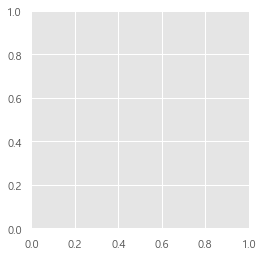

In [39]:
plt.pie(data_l, labels=num, shadow=True, startangle=90)
plt.legend(category, loc='upper right', bbox_to_anchor=(3.0, 1.3))
plt.show()